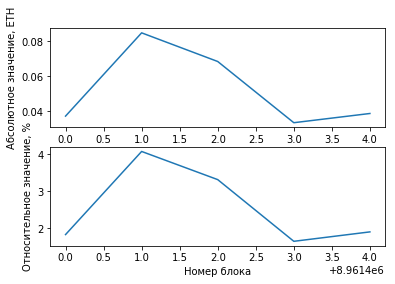

In [3]:
from web3 import Web3
import numpy as np
import matplotlib.pyplot as plt

ID = "31147d349a954d778f899f722337e064"

web3 = Web3(Web3.HTTPProvider("https://mainnet.infura.io/v3/" + ID))

reward = 2
K = 36
start = 8961400
end = 8961405
wei_to_eth = 10 ** -18
abs_fee = []
rel_fee = []
block_number = []


def trans(block):
    fee = 0
    for transaction in block.transactions:
        gasuse = web3.eth.getTransactionReceipt(transaction.hash).gasUsed
        price = transaction.gasPrice
        fee += gasuse * price
    return fee * wei_to_eth

for number in range(start, end):
	block = web3.eth.getBlock(number, True)
	fee = trans(block)
	block_number.append(number)
	abs_fee.append(fee)
	block_reward = reward + abs_fee[-1] + len(block.uncles) * 5 / 32
	rel_fee.append( abs_fee[-1] * 100 / block_reward)
	
Mx = np.mean(abs_fee)
Dx = np.var(abs_fee)
Standard_deviation = Dx ** (1 / 2)
median = np.median(abs_fee)
razmah = np.max(abs_fee) - np.min(abs_fee)

plt.subplot(2, 1, 1)
plt.plot(block_number, abs_fee)
plt.xlabel('Номер блока')
plt.ylabel('Абсолютное значение, ETH')

plt.subplot(2, 1, 2)
plt.plot(block_number, rel_fee)
plt.xlabel('Номер блока')
plt.ylabel('Относительное значение, %')
plt.show()